In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mitbih_test.csv to mitbih_test.csv
Saving mitbih_train.csv to mitbih_train.csv


In [ ]:
train_data = pd.read_csv("mitbih_train.csv", header=None)
test_data = pd.read_csv("mitbih_test.csv", header=None)

## Exploratory Data Analysis

In [ ]:
train_data.shape

(87554, 188)

In [ ]:
train_data.iloc[:, -1].value_counts().sort_index()

,count
187,
0.0,72471
1.0,2223
2.0,5788
3.0,641
4.0,6431


In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


In [ ]:
train_data.iloc[:, -1].unique()

array([0., 1., 2., 3., 4.])

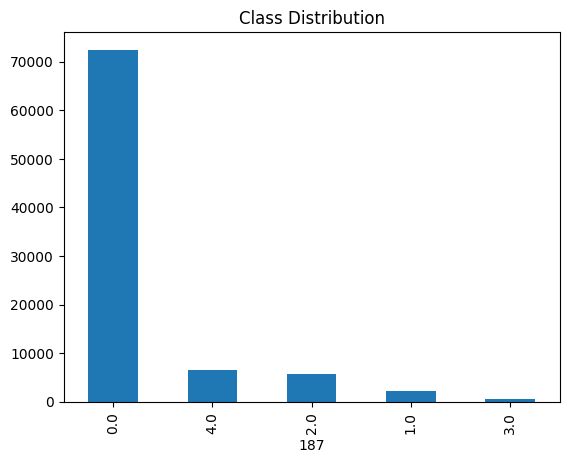

In [ ]:
train_data.iloc[:, -1].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

##Seperate features and labels

In [ ]:
X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values

X_test=test_data.iloc[:,:-1].values
y_test=test_data.iloc[:,-1].values

##Apply cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
X =X_train
y =y_train
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f'\nFOLD {fold + 1}')
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]


FOLD 1

FOLD 2

FOLD 3

FOLD 4

FOLD 5


## Visualize Random Heartbeats from the train_data

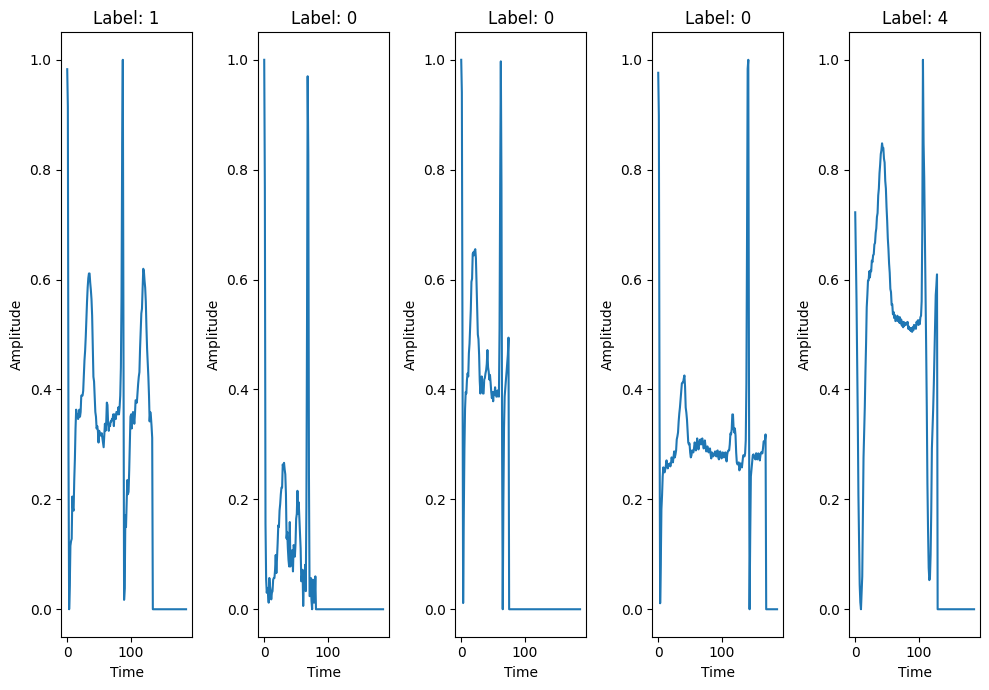

In [ ]:
#Shuffle the train_data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
plt.figure(figsize=(10, 7))
import random
random_indices = random.sample(range(len(X_train)), 5)
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.plot(X_train[idx])
    plt.title(f"Label: {int(y_train[idx])}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.tight_layout()
#plt.suptitle("Random Heartbeats from Training Data", fontsize=16)
plt.show();

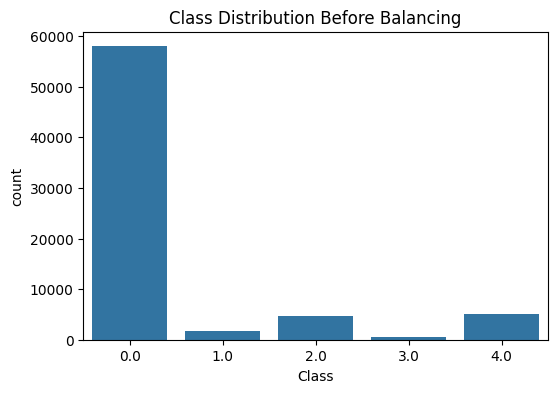

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# If y_train is a NumPy array, convert it to a pandas Series
import pandas as pd
y_train_series = pd.Series(y_train, name='Class')

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=y_train_series.to_frame())
plt.title('Class Distribution Before Balancing')
plt.show()

In [ ]:
print( pd.Series(y_train).value_counts())

0.0    57977
4.0     5145
2.0     4630
1.0     1779
3.0      513
Name: count, dtype: int64


## Balance the dataset by:

#Downsampling class 0 to 10,000 samples

#Upsampling classes 1 and 3 to 4,000 samples each

#Keeping other classes (2 and 4) as they are

In [ ]:
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

# 1. Combine X and y
df = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='label')], axis=1)

# 2. Downsample class 0 to 10,000
df_majority = df[df['label'] == 0.0]
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=10000,
                                   random_state=42)

# 3. Keep classes 2 and 4 as-is
df_class_2 = df[df['label'] == 2.0]
df_class_4 = df[df['label'] == 4.0]

# 4. Collect classes 1 and 3 for upsampling
df_class_1 = df[df['label'] == 1.0]
df_class_3 = df[df['label'] == 3.0]

# 5. Upsample class 1 to 4=4000
df_class_1_upsampled = resample(df_class_1,
                                replace=True,
                                n_samples=4000,
                                random_state=42)

# 6. Upsample class 3 to 4000
df_class_3_upsampled = resample(df_class_3,
                                replace=True,
                                n_samples=4000,
                                random_state=42)

# 7. Combine all classes
df_balanced = pd.concat([
    df_majority_downsampled,
    df_class_2,
    df_class_4,
    df_class_1_upsampled,
    df_class_3_upsampled
]).sample(frac=1, random_state=42)  # shuffle

# 8. Separate X and y
X_train_balanced = df_balanced.drop('label', axis=1).values
y_train_balanced = df_balanced['label'].values


In [ ]:
print( pd.Series(y_train_balanced).value_counts())

0.0    10000
4.0     5145
2.0     4630
3.0     4000
1.0     4000
Name: count, dtype: int64


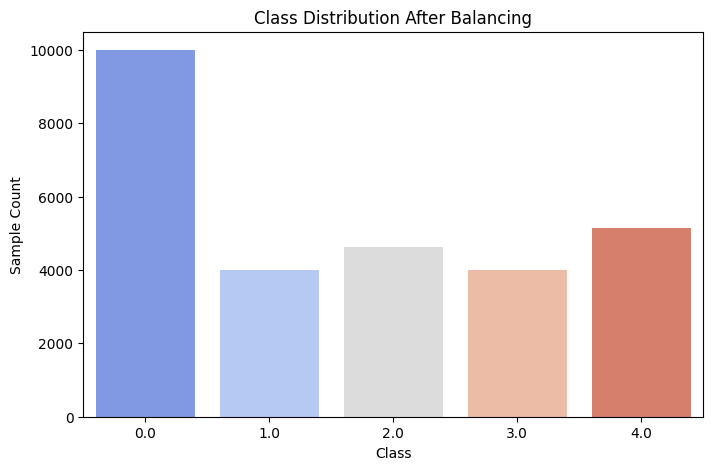

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_balanced, palette='coolwarm')
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Sample Count")
plt.show()

##Normalize the ECG signals

In [ ]:
X_train=X_train_balanced
y_train=y_train_balanced
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Visualize Random Heartbeats from the train_data after balancing it

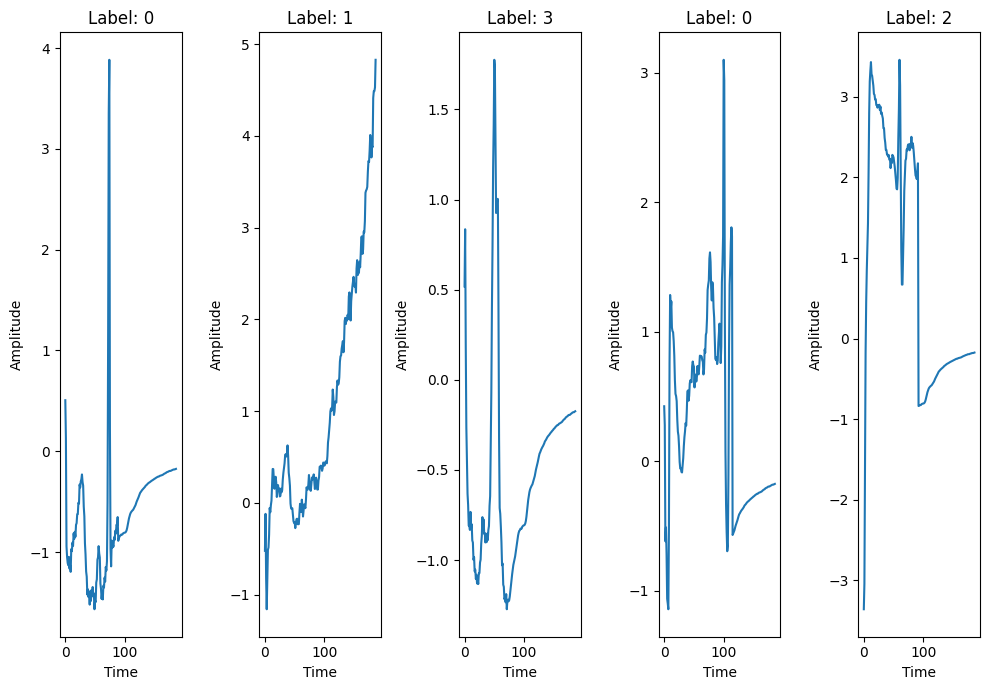

In [ ]:
plt.figure(figsize=(10, 7))
import random
random_indices = random.sample(range(len(X_train)), 5)
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.plot(X_train[idx])
    plt.title(f"Label: {int(y_train[idx])}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.tight_layout()
#plt.suptitle("Random Heartbeats from Training Data", fontsize=16)
plt.show();

##Convert to a PyTorch Dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader

class ECGDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [ ]:
train_dataset = ECGDataset(X_train, y_train)
test_dataset = ECGDataset(X_test, y_test)
val_dataset = ECGDataset(X_val, y_val)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

train_dataloader, val_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7dfcb35aa1d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7dfc92624d50>)

###Generate Wavelet Features(for Dual Branch)

In [ ]:
!pip install PyWavelets

In [ ]:
import pywt
# --- Wavelet Feature Extraction ---
def compute_wavelet(signal):
    coeffs, _ = pywt.cwt(signal, scales=np.arange(1, 31), wavelet='morl')
    return np.abs(coeffs).mean(axis=0)

# Apply to all training and validation data
wavelet_train = np.array([compute_wavelet(x) for x in X_train])
wavelet_test = np.array([compute_wavelet(x) for x in X_test])
wavelet_val = np.array([compute_wavelet(x) for x in X_val])

##Visualize Random Frequential (Wavelet) Signals from the wavelet_train

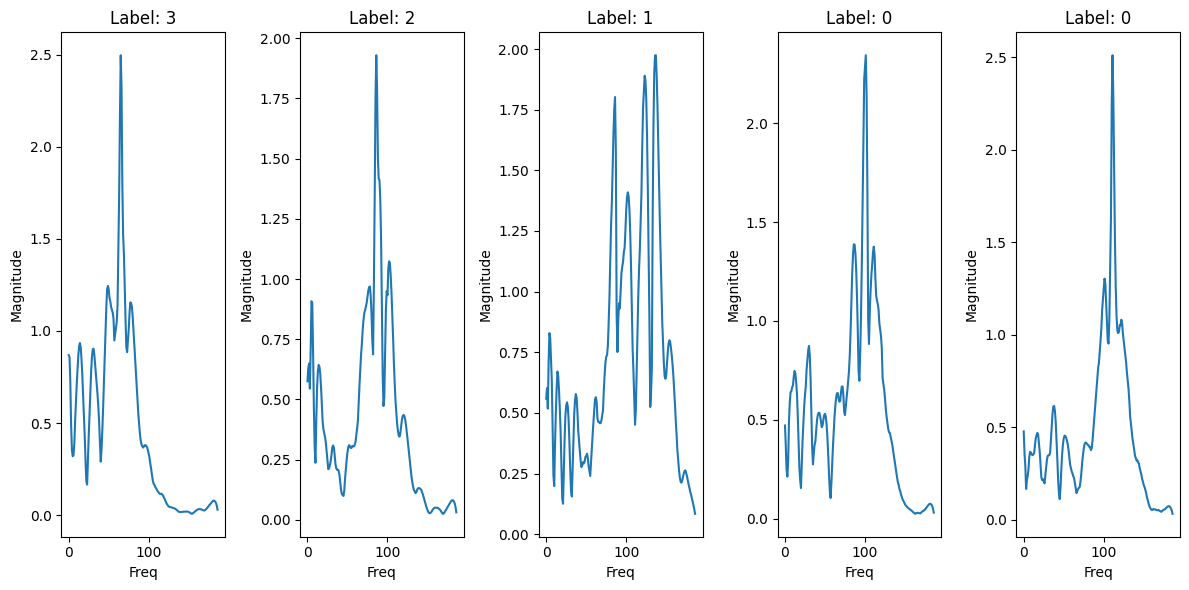

In [ ]:
# Select 5 random indices
random_indices = random.sample(range(len(wavelet_train)), 5)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.plot(wavelet_train[idx])
    plt.title(f"Label: {int(y_train[idx])}")
    plt.xlabel("Freq")
    plt.ylabel("Magnitude")
    plt.tight_layout()

# Uncomment if you want a title over the whole figure
# plt.suptitle("Random Frequential Representations (Wavelet)")

plt.show()

In [ ]:
# Model Architecture (Dual-Branch Transformer)
class ECGTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, dropout_rate=0.5):
        super(ECGTransformer, self).__init__()

        # Temporal branch
        self.temporal_proj = nn.Linear(input_dim, 64)
        self.temporal_transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=8, dim_feedforward=256),
            num_layers=3
        )

        # Frequency branch (assuming wavelet features)
        self.freq_proj = nn.Linear(input_dim, 64)
        self.freq_transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=8, dim_feedforward=256),
            num_layers=3
        )

        # Combine branches
        self.combine = nn.Linear(128, 64)
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(64, num_classes)

        # Batch normalization
        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(64)

    def forward(self, x):
        # Temporal branch
        x_temp = self.temporal_proj(x)
        x_temp = self.bn1(x_temp.transpose(1, 2)).transpose(1, 2)
        x_temp = self.temporal_transformer(x_temp)
        x_temp = x_temp.mean(dim=1)

        # Frequency branch (using same input for demo - replace with wavelet features)
        x_freq = self.freq_proj(x)
        x_freq = self.bn2(x_freq.transpose(1, 2)).transpose(1, 2)
        x_freq = self.freq_transformer(x_freq)
        x_freq = x_freq.mean(dim=1)

        # Combine branches
        x = torch.cat([x_temp, x_freq], dim=1)
        x = self.combine(x)
        x = self.dropout(x)
        x = self.classifier(x)

        return x

model = ECGTransformer(input_dim=X_train.shape[1], num_classes=5).to(device)
model

ECGTransformer(
  (temporal_proj): Linear(in_features=187, out_features=64, bias=True)
  (temporal_transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (freq_proj): Linear(in_features=187, out_features=64, bias=True)
  (freq_transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): Mul

In [ ]:
class_counts = np.bincount(y_train.astype(int))
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
class_weights = class_weights.to(device)

# Loss function with class weights
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with weight decay (L2 regularization)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)


In [ ]:
best_val_loss = float('inf')
patience = 5
patience_counter = 0
accumulation_steps = 2
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epochs=3
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0

  for i,(inputs, labels) in enumerate(train_dataloader):
    inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
    with torch.cuda.amp.autocast():
      outputs = model(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)/accumulation_steps

    # Backward pass and optimizer
    loss.backward()
    if (i + 1) % accumulation_steps == 0:
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()

    running_loss += loss.item()
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()

        # Validation
  model.eval()
  val_loss = 0.0
  val_correct = 0
  val_total = 0

  with torch.no_grad():
    for inputs, labels in val_dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)

      val_loss += loss.item()
      _, predicted = outputs.max(1)
      val_total += labels.size(0)
      val_correct += predicted.eq(labels).sum().item()

      # Calculate metrics
  train_loss = running_loss / len(train_dataloader)
  val_loss = val_loss / len(val_dataloader)
  train_acc = 100. * correct / total
  val_acc = 100. * val_correct / val_total

  # Update learning rate
  scheduler.step(val_loss)

        # Store metrics
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accs.append(train_acc)
  val_accs.append(val_acc)

  print(f'Epoch: {epoch+1} | Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}% | '
              f'Val Loss: {val_loss:.5f}, Val Acc: {val_acc:.2f}%')

        # Early stopping check
  if val_loss < best_val_loss:
    best_val_loss = val_loss
    torch.save(model.state_dict(), 'best_model.pth')
    patience_counter = 0
  else:
    patience_counter += 1
    if patience_counter >= patience:
      print("Early stopping triggered")
      break

Epoch: 1 | Train Loss: 0.29172, Train Acc: 76.88% | Val Loss: 0.63305, Val Acc: 76.95%
Epoch: 2 | Train Loss: 0.19084, Train Acc: 85.26% | Val Loss: 0.51278, Val Acc: 80.47%
Epoch: 3 | Train Loss: 0.15540, Train Acc: 87.92% | Val Loss: 0.50246, Val Acc: 81.01%


In [ ]:
best_val_loss = float('inf')
patience = 5
patience_counter = 0
accumulation_steps = 2
train_losses, val_losses ,test_losses= [], [],[]
train_accs, val_accs,test_accs = [], [],[]
epochs=100
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0

  for i,(inputs, labels) in enumerate(train_dataloader):
    inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
    with torch.cuda.amp.autocast():
      outputs = model(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)/accumulation_steps

    # Backward pass and optimizer
    loss.backward()
    if (i + 1) % accumulation_steps == 0:
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()

    running_loss += loss.item()
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()

        # Validation
  model.eval()
  val_loss = 0.0
  val_correct = 0
  val_total = 0

  with torch.no_grad():
    for inputs, labels in val_dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)

      val_loss += loss.item()
      _, predicted = outputs.max(1)
      val_total += labels.size(0)
      val_correct += predicted.eq(labels).sum().item()

        # Testing
  model.eval()
  test_loss = 0.0
  test_correct = 0
  test_total = 0

  with torch.no_grad():
    for inputs, labels in test_dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)

      test_loss += loss.item()
      _, predicted = outputs.max(1)
      test_total += labels.size(0)
      test_correct += predicted.eq(labels).sum().item()


      # Calculate metrics
  train_loss = running_loss / len(train_dataloader)
  val_loss = val_loss / len(val_dataloader)
  test_loss=test_loss/len(test_dataloader)
  train_acc = 100. * correct / total
  val_acc = 100. * val_correct / val_total
  test_acc=100.*test_correct/test_total

  # Update learning rate
  scheduler.step(val_loss)

        # Store metrics
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  test_losses.append(test_loss)
  train_accs.append(train_acc)
  val_accs.append(val_acc)
  test_accs.append(test_acc)
  if (epoch + 1) == 1 or (epoch + 1) % 10 == 0:
    print(f'Epoch: {epoch+1} | Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}% | '
              f'Val Loss: {val_loss:.5f}, Val Acc: {val_acc:.2f}% |'
              f'Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%')

  # still save the best model
  if val_loss < best_val_loss:
    best_val_loss = val_loss
    torch.save(model.state_dict(), 'best_model.pth')


Epoch: 1 | Train Loss: 0.13427, Train Acc: 89.56% | Val Loss: 0.51906, Val Acc: 80.25% |Test Loss: 0.52378, Test Acc: 80.01%
Epoch: 10 | Train Loss: 0.04606, Train Acc: 96.53% | Val Loss: 0.24886, Val Acc: 91.82% |Test Loss: 0.24802, Test Acc: 91.60%
Epoch: 20 | Train Loss: 0.03241, Train Acc: 97.40% | Val Loss: 0.22108, Val Acc: 93.06% |Test Loss: 0.22101, Test Acc: 92.87%
Epoch: 30 | Train Loss: 0.03209, Train Acc: 97.51% | Val Loss: 0.22536, Val Acc: 92.87% |Test Loss: 0.22583, Test Acc: 92.79%
Epoch: 40 | Train Loss: 0.03116, Train Acc: 97.59% | Val Loss: 0.22529, Val Acc: 92.90% |Test Loss: 0.22395, Test Acc: 92.77%
Epoch: 50 | Train Loss: 0.03163, Train Acc: 97.49% | Val Loss: 0.22044, Val Acc: 93.08% |Test Loss: 0.22034, Test Acc: 92.87%
Epoch: 60 | Train Loss: 0.03256, Train Acc: 97.54% | Val Loss: 0.22264, Val Acc: 92.99% |Test Loss: 0.22373, Test Acc: 92.83%
Epoch: 70 | Train Loss: 0.03187, Train Acc: 97.46% | Val Loss: 0.21948, Val Acc: 93.14% |Test Loss: 0.21923, Test Acc: 

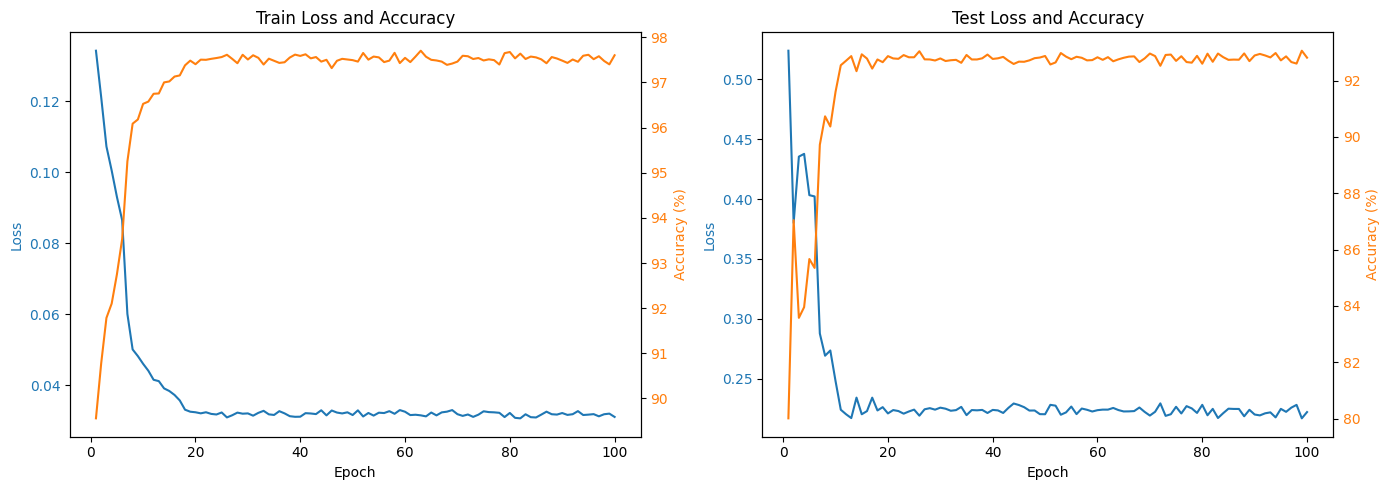

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_losses) + 1)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Left subplot: Train Loss & Train Accuracy
axs[0].plot(epochs_range, train_losses, label='Train Loss', color='tab:blue')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss', color='tab:blue')
axs[0].tick_params(axis='y', labelcolor='tab:blue')
axs[0].set_title('Train Loss and Accuracy')

ax2 = axs[0].twinx()
ax2.plot(epochs_range, train_accs, label='Train Accuracy', color='tab:orange')
ax2.set_ylabel('Accuracy (%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Right subplot: Test Loss & Test Accuracy
axs[1].plot(epochs_range, test_losses, label='Test Loss', color='tab:blue')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss', color='tab:blue')
axs[1].tick_params(axis='y', labelcolor='tab:blue')
axs[1].set_title('Test Loss and Accuracy')

ax4 = axs[1].twinx()
ax4.plot(epochs_range, test_accs, label='Test Accuracy', color='tab:orange')
ax4.set_ylabel('Accuracy (%)', color='tab:orange')
ax4.tick_params(axis='y', labelcolor='tab:orange')

plt.tight_layout()
plt.show()


In [ ]:
model_results = pd.DataFrame([{
    'model_name': model.__class__.__name__,
    'model_loss': test_loss,
    'model_acc': test_acc
}])

model_results

,model_name,model_loss,model_acc
0,ECGTransformer,0.222142,92.814727


##Make and evaluate random prediction with our model

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
            # Reshape the sample to have 3 dimensions for the model input (unsqueeze on dim=1)
            sample = sample.unsqueeze(1)
            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
# Get a list of random row indices
random_indices = random.sample(range(len(test_data)), k=9)

# Use the indices to access data and labels
for idx in random_indices:
    # Convert sample to PyTorch tensor
    sample = torch.tensor(test_data.iloc[idx, :-1].values, dtype=torch.float32)
    label = test_data.iloc[idx, -1]
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]}")

Test sample image shape: torch.Size([187])
Test sample label: 2.0


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model,
                             data=test_samples)

# View first 5 prediction probabilities list
pred_probs[:5]

tensor([[3.0890e-02, 7.5036e-03, 8.7353e-01, 2.0359e-05, 8.8054e-02],
        [9.0181e-01, 1.9152e-03, 9.5687e-02, 1.5759e-04, 4.3088e-04],
        [9.9092e-01, 8.0607e-03, 8.1590e-04, 1.5602e-04, 4.4311e-05],
        [6.0541e-01, 3.9295e-01, 1.3585e-03, 5.7112e-05, 2.2870e-04],
        [9.8986e-01, 1.0115e-02, 1.7936e-05, 1.4161e-06, 6.8555e-06]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)
print(f'test labels :{test_labels_tensor}')
print(f'pred calsses:{pred_classes}')

test labels :tensor([2, 0, 0, 0, 0, 0, 0, 0, 0])
pred calsses:tensor([2, 0, 0, 0, 0, 0, 0, 0, 0])


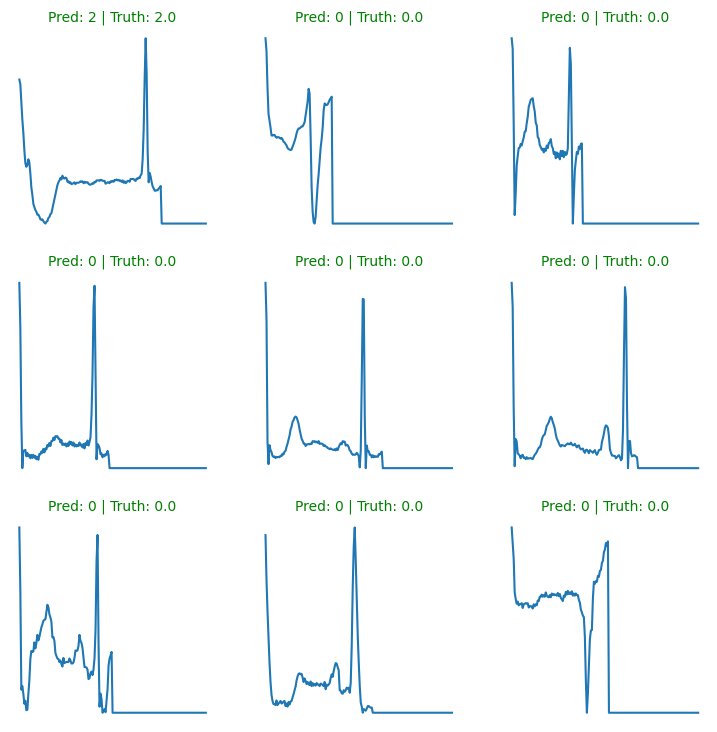

In [ ]:
#Now let's visualize:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  plt.plot(sample.squeeze())

  # Find the prediction label (in text form, e.g. "0")
  pred_label = pred_classes[i]

  # Get the truth label (in text form, e.g. "2")
  truth_label = test_labels[i]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

###Making a confusion matrix for further prediction evaluation :!

In [ ]:
from tqdm.auto import tqdm
y_preds=[]
model.eval()
with torch.no_grad():
  for input, label in tqdm(test_dataloader,desc='Making predictions'):
    input, label = input.to(device), label.to(device)
    y_pred = model(input.unsqueeze(1))
    #Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/343 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 848.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.2 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.23.4


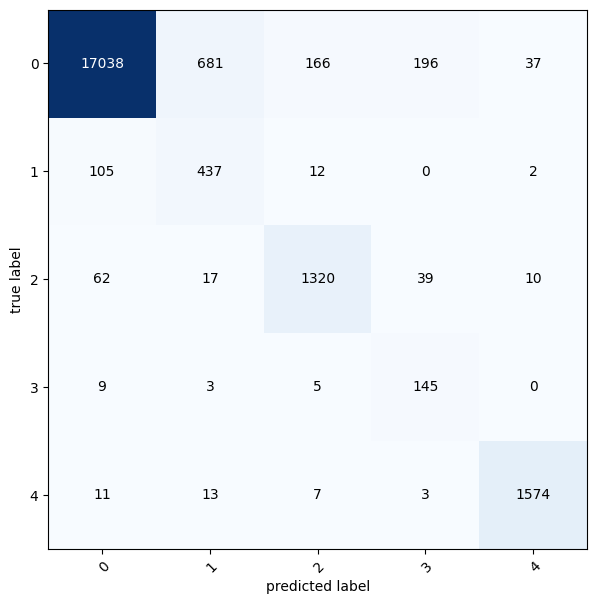

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 'y_test' contains the target labels
confmat = ConfusionMatrix(num_classes=5, task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor.argmax(dim=1),
                         target=torch.tensor(y_test, dtype=torch.int64))  # Convert y_test to a PyTorch tensor

# Define class names
class_names = ['0', '1', '2', '3', '4']

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);

Normalized confusion matrix


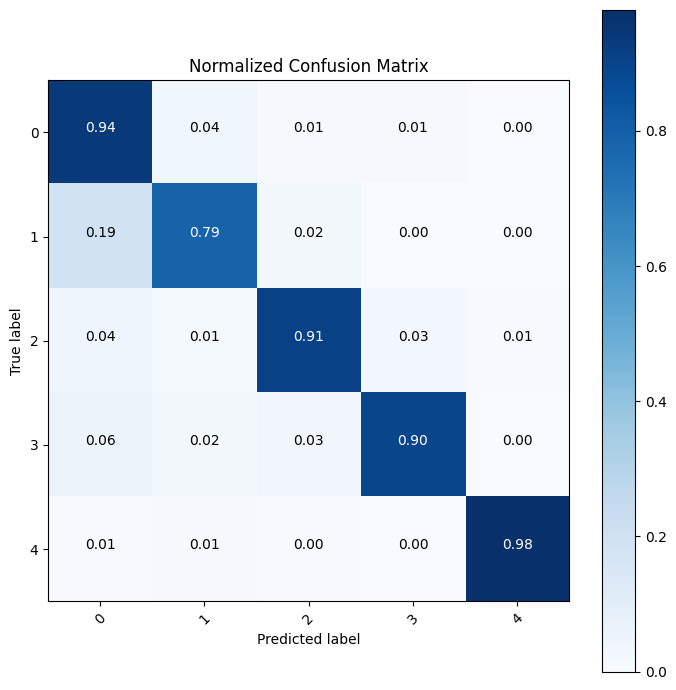

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import torch

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Displays the confusion matrix with or without normalization.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred_labels = y_pred_tensor.argmax(dim=1).cpu().numpy()
y_true_labels = torch.tensor(y_test).cpu().numpy()

# --- Compute the confusion matrix using scikit-learn ---
cnf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix,
                      classes= ['0', '1', '2', '3', '4'],
                      normalize=True,
                      title='Normalized Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true_labels, y_pred_labels, digits=4))

              precision    recall  f1-score   support

         0.0     0.9891    0.9404    0.9642     18118
         1.0     0.3797    0.7860    0.5120       556
         2.0     0.8742    0.9116    0.8925      1448
         3.0     0.3786    0.8951    0.5321       162
         4.0     0.9698    0.9789    0.9743      1608

    accuracy                         0.9371     21892
   macro avg     0.7183    0.9024    0.7750     21892
weighted avg     0.9601    0.9371    0.9455     21892



## ROC and AUC

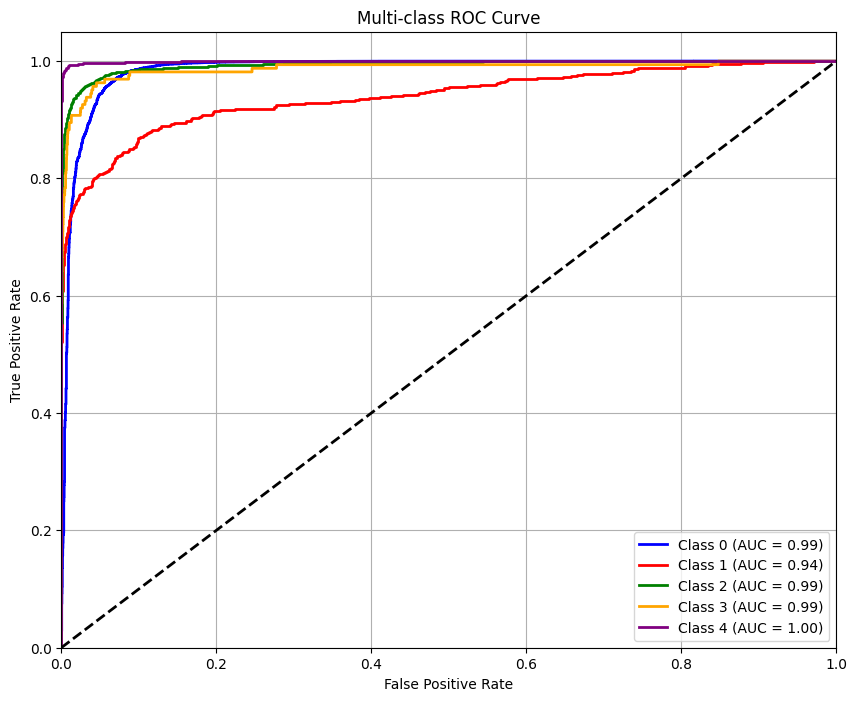

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import torch # Make sure torch is imported if not already

n_classes = 5

# Use y_true_labels which contains the ground truth labels
y_true_bin = label_binarize(y_true_labels, classes=[0,1,2,3,4])

fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate the softmax probabilities to get class scores
y_score = torch.softmax(y_pred_tensor, dim=1).cpu().numpy()

for i in range(n_classes):
    # Use the binarized true labels and the predicted scores
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10,8))
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


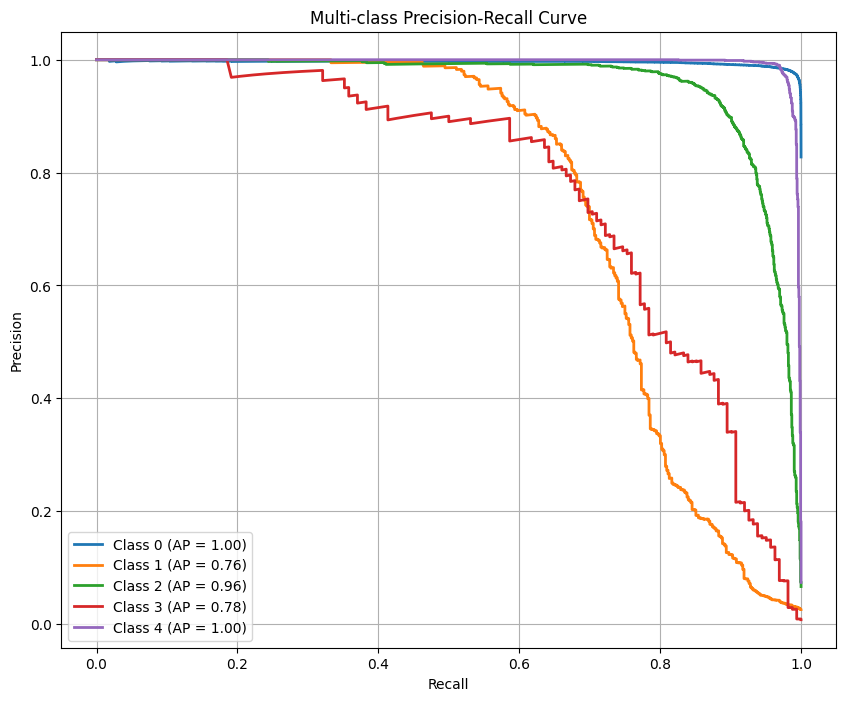

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# y_true: true labels (shape: [n_samples])
# y_score: predicted probabilities (shape: [n_samples, n_classes])
# Binarize true labels for one-vs-rest approach
from sklearn.preprocessing import label_binarize

n_classes = y_score.shape[1]
# Corrected: Use y_true_labels instead of y_true
y_test_bin = label_binarize(y_true_labels, classes=np.arange(n_classes))

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_prec = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i} (AP = {avg_prec:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multi-class Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


##Save and load our model

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True )

# Create model save path
MODEL_NAME = "ECG_arrhythmia_classification_model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/ECG_arrhythmia_classification_model_3.pth


#####Now we've got a saved model state_dict() we can load it back in using a combination of load_state_dict() and torch.load().

#####Since we're using load_state_dict(), we'll need to create a new instance of ECGTransformer() with the same input parameters as our saved model state_dict()

In [ ]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
#Provide input_dim and num_classes while creating an instance of ECGTransformerV3
loaded_model = ECGTransformer(input_dim=X_train.shape[1],num_classes=5)

# Load in the saved state_dict()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model= loaded_model.to(device)

In [ ]:
# iterate through the keys and compare individual tensors using torch.equal()
all_equal = True
for key in loaded_model.state_dict():
    if not torch.equal(loaded_model.state_dict()[key], loaded_model.state_dict()[key]):
        all_equal = False
        break

print(all_equal)  # This will print True if all tensors are equal

True


####Now that we've got a loaded model we can evaluate it to make sure its parameters work similarly to model_3 prior to saving

In [ ]:
for epoch in range(10):
  loaded_model.eval()
  loaded_test_loss = 0.0
  test_correct = 0
  test_total = 0

  with torch.no_grad():
    for inputs, labels in test_dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = loaded_model(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)

      loaded_test_loss += loss.item()
      _, predicted = outputs.max(1)
      test_total += labels.size(0)
      test_correct += predicted.eq(labels).sum().item()


      # Calculate metrics
  loaded_test_loss=loaded_test_loss/len(test_dataloader)
  loaded_test_acc=100.*test_correct/test_total

  # Update learning rate
  scheduler.step(test_loss)


In [ ]:
loaded_model_results = pd.DataFrame([{
    'model_name': loaded_model.__class__.__name__,
    'model_loss': loaded_test_loss,
    'model_acc': loaded_test_acc
}])
loaded_model_results

,model_name,model_loss,model_acc
0,ECGTransformer,0.222142,92.814727


In [ ]:
model_results

,model_name,model_loss,model_acc
0,ECGTransformer,0.222142,92.814727
